In [4]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggrepel)
library(EnhancedVolcano)

In [5]:
# root
ROOT = '/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/'

# read in the data
# df = pd.read_csv('Excitatory_C9ALSvsCTRL/gene.txt', sep='\t')
df = read.table(paste0(ROOT, 'Excitatory_C9ALSvsCTRL/gene.txt'), sep='\t', header=T)
head(df)

,gene,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,nread.c1.2,nread.c1.3,nread.c1.4,nread.c1.5,nread.c2.1,nread.c2.2,nread.c2.3,nread.c2.4,nread.c2.5
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,B3GALT6,2,2.14e-06,1.6000,NA,2.720,6.07e-07,NA,NA,0,72,0,0,0,0,0,0,63,0
2,PUSL1,4,1.30e-01,0.2120,NA,0.964,1.22e-02,NA,NA,37,193,0,0,88,79,0,40,125,0
3,MIB2,2,3.96e-03,NA,0.917,NA,NA,0.917,1.15e-03,61,315,0,0,327,467,75,384,931,0
4,PRKCZ,4,3.76e-03,-0.3340,0.641,-0.564,1.61e-02,0.836,2.51e-08,170,589,0,105,491,488,57,446,848,29
5,SKI,5,3.94e-01,-0.1430,-0.228,-0.556,5.31e-02,0.177,6.46e-01,34,150,0,34,162,293,34,126,220,0
6,RER1,4,3.31e-02,0.0744,0.464,0.748,1.88e-02,0.908,1.78e-03,80,376,0,0,165,170,0,74,290,0


Warning message:
“ggrepel: 47 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


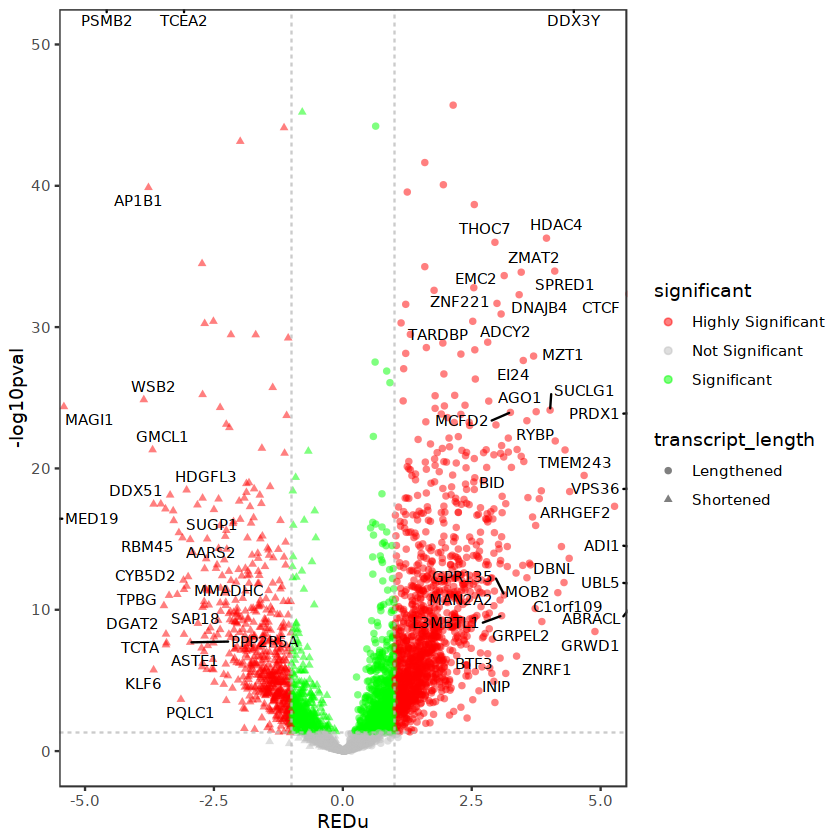

In [20]:
library(ggplot2)
library(dplyr)
library(ggrepel)

# Threshold for significance
threshold <- 0.05

# Add a significance column based on p-value
df$significant <- ifelse(df$REDu.pval < threshold, "Significant", "Not Significant")

# Further categorize based on log2FC
df$significant <- ifelse(df$significant == "Significant" & abs(df$REDu) > 1, "Highly Significant", df$significant)

# Add a category for lengthened and shortened
df$transcript_length <- ifelse(df$REDu > 0, "Shortened", "Lengthened")

# Create a subset of df for top 100 most significant genes
top100 <- df[order(abs(df$REDu), decreasing=T),] %>% head(100)
# include TARDBP in the top 100
top100 <- rbind(top100, df[df$gene == "TARDBP",])

# Plot the volcano plot
volcano_plot <- ggplot(df, aes(x=-1*REDu, y=neglog10pval, color=significant, shape=transcript_length)) +
    geom_point(alpha=0.5, size=1.5) +
    scale_color_manual(values=c("red", "grey", "green")) +
    scale_shape_manual(values=c(16, 17)) +
    theme_bw() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "right",
          plot.title = element_text(hjust = 0.5)) +
    xlab('REDu') + 
    ylab('-log10pval') + 
    geom_text_repel(data = top100, aes(label = gene), size = 3, color='black') +
    geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "grey", alpha = 0.8) +
    geom_hline(yintercept = -log10(threshold), linetype = "dashed", color = "grey", alpha = 0.8) +
    coord_cartesian(xlim = c(-5, 5), ylim=c(0,50)) # restrict x-axis limits

print(volcano_plot)


Warning message:
“ggrepel: 50 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


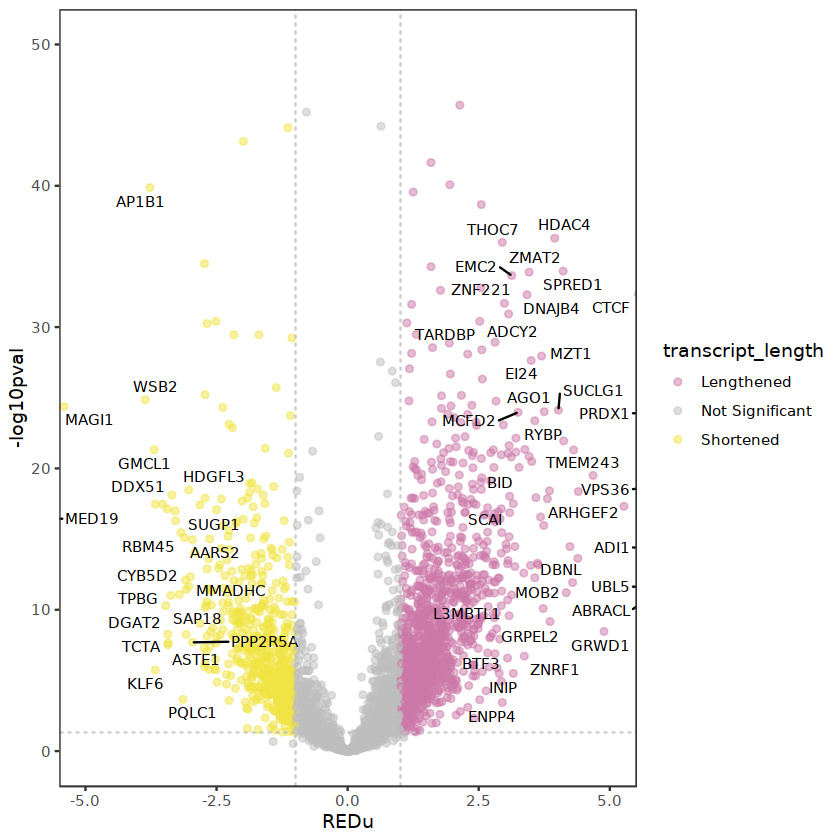

In [25]:
library(ggplot2)
library(dplyr)
library(ggrepel)

# Threshold for significance
threshold <- 0.05

# Filter out rows where -log10pval is greater than 50
df <- df[!df$neglog10pval > 50,]

# Add a significance column based on p-value
df$significant <- ifelse(df$REDu.pval < threshold, "Significant", "Not Significant")

# Further categorize based on log2FC
df$significant <- ifelse(df$significant == "Significant" & abs(df$REDu) > 1, "Significant", "Not Significant")

# Add a category for lengthened and shortened
df$transcript_length <- ifelse(df$REDu > 0 & df$significant == "Significant", "Shortened", 
                               ifelse(df$REDu < 0 & df$significant == "Significant", "Lengthened", "Not Significant"))

# Create a subset of df for top 100 most significant genes
top100 <- df[order(abs(df$REDu), decreasing=T),] %>% head(100)
# include TARDBP in the top 100
top100 <- rbind(top100, df[df$gene == "TARDBP",])

# Plot the volcano plot
volcano_plot <- ggplot(df, aes(x=-1*REDu, y=neglog10pval, color=transcript_length)) +
    geom_point(alpha=0.5, size=1.5) +
    scale_color_manual(values=c("#CC79A7", "grey", "#F0E442"), labels=c("Lengthened", "Not Significant", "Shortened")) +
    theme_bw() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "right",
          plot.title = element_text(hjust = 0.5)) +
    xlab('REDu') + 
    ylab('-log10pval') + 
    geom_text_repel(data = top100, aes(label = gene), size = 3, color='black') +
    geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "grey", alpha = 0.8) +
    geom_hline(yintercept = -log10(threshold), linetype = "dashed", color = "grey", alpha = 0.8) +
    coord_cartesian(xlim = c(-5, 5), ylim=c(0,50)) # restrict x-axis and y-axis limits

print(volcano_plot)


In [31]:
library(ggplot2)
library(dplyr)
library(ggrepel)

volcano_plot_func <- function(df) {
  
  # Threshold for significance
  threshold <- 0.05

  # Filter out rows where -log10pval is greater than 50
  df <- df[!df$neglog10pval > 50,]

  # Add a significance column based on p-value
  df$significant <- ifelse(df$REDu.pval < threshold, "Significant", "Not Significant")

  # Further categorize based on log2FC
  df$significant <- ifelse(df$significant == "Significant" & abs(df$REDu) > 1, "Significant", "Not Significant")

  # Add a category for lengthened and shortened
  df$transcript_length <- ifelse(df$REDu > 0 & df$significant == "Significant", "Shortened", 
                                 ifelse(df$REDu < 0 & df$significant == "Significant", "Lengthened", "Not Significant"))

  # Create a subset of df for top 100 most significant genes
  top100 <- df[order(abs(df$REDu), decreasing=T),] %>% head(100)
  # include TARDBP in the top 100
  top100 <- rbind(top100, df[df$gene == "TARDBP",])

  # Plot the volcano plot
  volcano_plot <- ggplot(df, aes(x=-1*REDu, y=neglog10pval, color=transcript_length)) +
      geom_point(alpha=0.5, size=1.5) +
      scale_color_manual(values=c("#CC79A7", "grey", "#F0E442"), labels=c("Lengthened", "Not Significant", "Shortened"), name = "Transcript Length") +
      theme_bw() + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            legend.position = "right",
            plot.title = element_text(hjust = 0.5)) +
      xlab('REDu') + 
      ylab('-log10pval') + 
      geom_text_repel(data = top100, aes(label = gene), size = 3, color='black') +
      geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "grey", alpha = 0.8) +
      geom_hline(yintercept = -log10(threshold), linetype = "dashed", color = "grey", alpha = 0.8) +
      coord_cartesian(xlim = c(-5, 5), ylim=c(0,50)) # restrict x-axis and y-axis limits

  return(volcano_plot)
}


Warning message:
“ggrepel: 50 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


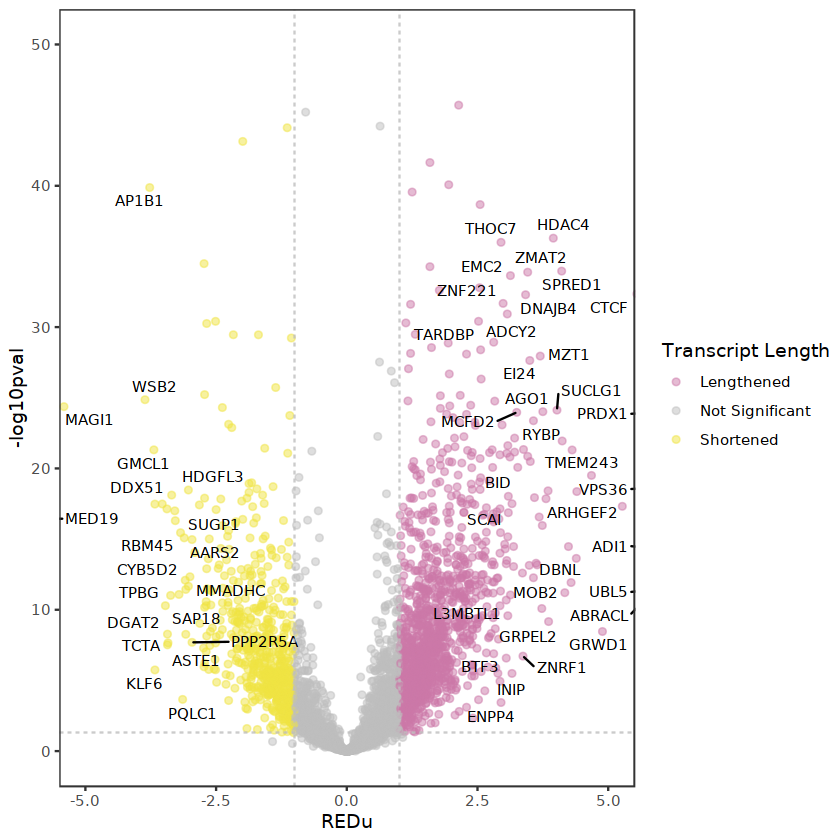

In [32]:
# You can call this function by:
plot <- volcano_plot_func(df)
print(plot)